# Author: <font color = 'brown'> Syed Salman Rahman (N13866121)</font>

# <font color='blue'> Where and what type of Recycle Stations should be newly deployed in NYC? </font>

# <u>Context/Research Question</u>

## New York residents are estimated to produce approximately 12,000 tonnes of waste everyday. Each year a significant amount of the tax has to be allocated for collection, disposal and sending of waste to landfills. Landfills are responsible for 36% of all methane emissions in the US, one of the most potent contributors to global warming.

## In the light of the exorbitant and long term environmental and economical effects, New York City has declared a 20 year Solid Waste Management Plan to reduce its waste disposal.
## Recycling  is undoubtedly one of the most vital part in order to achieve this goal. Currently it is found out that residential recycling rate stands at around 18%.
## Currently, recycling stations are situated around the different boroughs of New York City. In this case study, I will examine the distribution of different types recycle stations across New York City's 5 boroughs and attempt to design a strategy for where to add more recycle stations in general and recommendations for deployment of specific waste recycling stations to fulfill inadequacies in each boroughs.

In [172]:
#importing all necessary libraries and packages

import pandas as pd 
import numpy as np
import os
import math
import dash                     
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import plotly.offline as py 
import plotly.graph_objs as go 

#N.B: In order to run this, install dash and plotly components too on conda.

# <u>Dataset</u>

## The dataset used for this case study is a compilation of multiple datasets consisting data on different types of recycling stations from *The City of New York, Department of Sanitation (DSNY)*.

## The dataset consists of: 1. Name of the site of the recycling station, 2. Borough the station is situated at, 3. Specific address in text, 4. Longitude and Latitude coordinates of the station,    5. Type of recycling station.

### 1. https://data.cityofnewyork.us/Environment/Electronics-Drop-Off-Locations-in-NYC/wshr-5vic

### 2. https://data.cityofnewyork.us/Environment/Public-Recycling-Bins/sxx4-xhzg

### 3. https://data.cityofnewyork.us/Environment/Food-Scrap-Drop-Off-Locations-in-NYC-Map-/qfn2-4jea




** Compiled Database: https://cutt.ly/2QvRPsz

In [173]:
bins_df = pd.read_csv("finalrecycling.csv") # loading the data set to pandas

In [174]:
print('Hotspot dataframe dimensions: {} rows, {} columns'.format(bins_df.shape[0], bins_df.shape[1]))  #finding the dimension of the dataframe

Hotspot dataframe dimensions: 787 rows, 8 columns


In [175]:
bins_df.columns #column title of the DF

Index(['name_location', 'boro', 'address_area', 'latitude', 'longitude',
       'type', 'color', 'hov_txt'],
      dtype='object')

In [176]:
bins_df.head() #sample of the data available in the DF

,name_location,boro,address_area,latitude,longitude,type,color,hov_txt
0,Mary Mitchell Center,Bronx,"2007 Mapes Ave, Bronx 10460",40.844772,-73.887226,compost,#ff00ff,compost<br>Name: Mary Mitchell Center <br>Addr...
1,Bronx Borough Hall Greenmarket,Bronx,"Grand Concourse and 161 St, Bronx, NY, 10451",40.826920,-73.922504,compost,#ff00ff,compost<br>Name: Bronx Borough Hall Greenmarke...
2,Compost drop off BronxWorks,Bronx,1130 Grand Concourse,40.832640,-73.918774,compost,#ff00ff,compost<br>Name: Compost drop off BronxWorks <...
3,"Learn it, Grow it, Eat it Youthmarket",Bronx,McKinley Sq. at 169th St. & Boston Road,40.831202,-73.900413,compost,#ff00ff,"compost<br>Name: Learn it, Grow it, Eat it You..."
4,Parkchester Greenmarket,Bronx,"White Plains Rd & Westchester Ave, Bronx, NY 1...",40.833022,-73.862728,compost,#ff00ff,compost<br>Name: Parkchester Greenmarket<br>Ad...


# <u>Data processing</u>

## 1. Converting all Longitude and Latitude data to 7 decimal places to have an uniform value for all the Longitude and Latitude data
## 2. A column titled "hov_text" through a dictionary is added which will consist of Name of the site as String, Address as String, Type of Recycle station as String. This column will help in the visualization of the recycling stations in a Scatter Plot Map.
## 3. Remove rows that contain "empty" or "NaN" values in the "Longitude" and "Latitude" variables
## 4. Creating a dictionary consisting of Population of each borough
## 5. Creating a dictionary consisting of Area Size of each borough


In [177]:
bins_df.longitude = bins_df.longitude.round(decimals=7) #rounding all the values in longitude to 7DP
bins_df.latitude = bins_df.latitude.round(decimals=7) #rounding all the values in latitude to 7DP


In [178]:
bins_df = bins_df.replace("", np.NaN) #replacing all the empty values to NaN
bins_df.dropna(inplace=True) #Removing cells containing the empty cell values

In [179]:
bins_df.head()

,name_location,boro,address_area,latitude,longitude,type,color,hov_txt
0,Mary Mitchell Center,Bronx,"2007 Mapes Ave, Bronx 10460",40.844772,-73.887226,compost,#ff00ff,compost<br>Name: Mary Mitchell Center <br>Addr...
1,Bronx Borough Hall Greenmarket,Bronx,"Grand Concourse and 161 St, Bronx, NY, 10451",40.826920,-73.922504,compost,#ff00ff,compost<br>Name: Bronx Borough Hall Greenmarke...
2,Compost drop off BronxWorks,Bronx,1130 Grand Concourse,40.832640,-73.918774,compost,#ff00ff,compost<br>Name: Compost drop off BronxWorks <...
3,"Learn it, Grow it, Eat it Youthmarket",Bronx,McKinley Sq. at 169th St. & Boston Road,40.831202,-73.900413,compost,#ff00ff,"compost<br>Name: Learn it, Grow it, Eat it You..."
4,Parkchester Greenmarket,Bronx,"White Plains Rd & Westchester Ave, Bronx, NY 1...",40.833022,-73.862728,compost,#ff00ff,compost<br>Name: Parkchester Greenmarket<br>Ad...


Longitude and latitude data have uniform decimal places.
Rows with empty cell values are removed.

In [180]:
#Creating a dictionary consisting population of each boro. Extracted from the "Week 4: Wifi Hotspot" Case study.

population_dict = {
                'Manhattan' : 1628706,
                'Brooklyn' : 2559903,
                'Queens' : 2253858,
                'Bronx' : 1418207,
                'StatenIsland' : 476143 
}



In [181]:
#Creating a dictionary consisting area size of each boro. Extracted from the "Week 4: Wifi Hotspot" Case study.

area_dict = {
            'Manhattan' : 22.83,
            'Brooklyn' : 70.82,
            'Queens' : 108.53,
            'Bronx' : 42.10,
            'StatenIsland' : 58.37 
        }


# <u>Analysis</u>

## <font color = "Blue">1. Finding the density of all recycle stations over population in each borough.</font>
### If we can figure out the ratio of recycling station to the population of each borough, we can find the disparity in the distribution.



In [182]:
#Number of recycle stations situated at each Borough

boro_counts = bins_df.boro.value_counts() 
boro_counts

Manhattan        293
Queens           158
Bronx            142
Brooklyn         139
Staten Island     51
Name: boro, dtype: int64

### We can see Manhattan has the highest no. of Recycling Stations. A good way to proceed is to see the distrubtion of the recycling stations when adjusted with the population.

In [183]:
#Dictionary containing the Boro Names, Number of bins and the population in the respective boroughs

bins_plots = {
    'Boro':['Manhattan','Brooklyn','Queens','Bronx','StatenIsland'],
    'N_bins':[293,139,162,142,51],
    'Population':[1628706,2559903,2253858,1418207,476143],
} 
bins_plots = pd.DataFrame(data=bins_plots)
bins_plots

,Boro,N_bins,Population
0,Manhattan,293,1628706
1,Brooklyn,139,2559903
2,Queens,162,2253858
3,Bronx,142,1418207
4,StatenIsland,51,476143


In [184]:
#Normalizing all the data to get a better plot 

def normalize_columns(col):
  sum_val = sum(col)
  normalized_val = col/sum_val
  return normalized_val 

#plotting the no.of bins against the population at each borough

bins_plots[["N_bins", "Population"]] = bins_plots[["N_bins", "Population"]].apply(normalize_columns)
bins_plots 

,Boro,N_bins,Population
0,Manhattan,0.372300,0.195363
1,Brooklyn,0.176620,0.307060
2,Queens,0.205845,0.270350
3,Bronx,0.180432,0.170114
4,StatenIsland,0.064803,0.057113


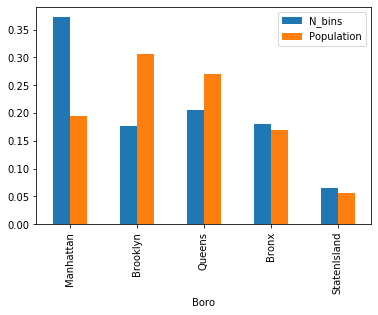

In [185]:
bins_plots.plot(x='Boro',kind='bar',stacked=False)

In [186]:
#Ratio of Population to No. of Bins in each borough

bins_plots['ratio'] = bins_plots.apply(lambda x: x['Population']/x['N_bins'], axis=1)
bins_plots[['Boro','ratio']]

,Boro,ratio
0,Manhattan,0.524746
1,Brooklyn,1.738534
2,Queens,1.313367
3,Bronx,0.942813
4,StatenIsland,0.881336


###  <font color = "blue"> We can finally see the number of people in each boro sharing a recycle station: </font>

In [187]:
population_dict = {
    'Manhattan' : 1628706,
    'Brooklyn' : 2559903,
    'Queens' : 2253858,
    'Bronx' : 1418207,
}
StatenIsland = 476143 
population_dict = {key: value for key, value in sorted(population_dict.items(), key=lambda item: item[1])}

for val in population_dict:
    print("There are {:,} people for every recycle staion in {}".format(round(population_dict[val]/boro_counts[val],2),val))

print("There are {:,} people for every recycle staion in {}".format(round(StatenIsland/51),2), "Staten Island")

There are 9,987.37 people for every recycle staion in Bronx
There are 5,558.72 people for every recycle staion in Manhattan
There are 14,264.92 people for every recycle staion in Queens
There are 18,416.57 people for every recycle staion in Brooklyn
There are 9,336 people for every recycle staion in 2 Staten Island


### <font color = 'green'><b>It can be infered that Brooklyn has the highest number of resident who has to share a recycling station in average. Based on this, number of recycling stations should be added to Brooklyn.</b> </font>

## <font color = "Blue"> 2. Density of all recycle stations over area size of each borough</font>

In [188]:
area_dict = {
            'Manhattan' : 22.83,
            'Brooklyn' : 70.82,
            'Queens' : 108.53,
            'Bronx' : 42.10,
            'StatenIsland' : 58.37 
        }
area_dict = {key: value for key, value in sorted(area_dict.items(), key=lambda item: item[1])}

for val in population_dict:
    print("There are {:,} recycle stations for every square mile in {}".format(round(boro_counts[val]/area_dict[val],2),val))

There are 3.37 recycle stations for every square mile in Bronx
There are 12.83 recycle stations for every square mile in Manhattan
There are 1.46 recycle stations for every square mile in Queens
There are 1.96 recycle stations for every square mile in Brooklyn


### <font color='green'> <b>Queens has the lowest recycle station per unit square mile area while Manhattan is the most densed.</b>
</font>



## <font color = "Blue"> 3. Comparison of distribution of specific type of recycling stations at different borughs</font>

In [189]:
bins_df = pd.read_csv("finalrecycling.csv")

In [190]:
bins_df = bins_df[['boro','type']] # limiting the dataframe to only Borough names and types of recycling stations

In [191]:
#printing all the values in the columns boro and type

for col in ['boro','type']: 
  print('\n','Column: '+col,'\n')
  for val in bins_df[col].unique():
    print(val)


 Column: boro 

Bronx
Brooklyn
Manhattan
Queens
Staten Island

 Column: type 

compost
electronics
hazardous waste recycling
plastic bag recycling
public recycling bin


In [192]:
# filtering recycling stations in all boros to "compost" type only.

bins_df = bins_df[bins_df.type == "compost"]

In [193]:
bins_df['type'].value_counts()

compost    146
Name: type, dtype: int64

In [194]:
#Segregation of compost throughtout the different boroughs

boro_counts_compost = bins_df.boro.value_counts() 
boro_counts_compost

Manhattan        70
Queens           25
Bronx            24
Brooklyn         23
Staten Island     4
Name: boro, dtype: int64

### <font color = 'green'> <b>Staten Island has the lowest number of "Compost" recycling stations. So we can deploy more of this type of recycling in Staten Island.</b> </font>

In [195]:
bins_df = pd.read_csv("finalrecycling.csv")

In [196]:
for col in ['boro','type']:
  print('\n','Column: '+col,'\n')
  for val in bins_df[col].unique():
    print(val)


 Column: boro 

Bronx
Brooklyn
Manhattan
Queens
Staten Island

 Column: type 

compost
electronics
hazardous waste recycling
plastic bag recycling
public recycling bin


In [197]:
bins_df = bins_df[['boro','type']]

In [198]:
# filtering recycling stations in all boros to "electronics" type only.

bins_df = bins_df[bins_df.type == "electronics"]

In [199]:
bins_df['type'].value_counts()

electronics    93
Name: type, dtype: int64

In [200]:
boro_counts_elec = bins_df.boro.value_counts()
boro_counts_elec

Manhattan        37
Brooklyn         22
Queens           20
Bronx            10
Staten Island     4
Name: boro, dtype: int64

### <font color = 'green'> <b>Staten Island has the lowest number of "Electronics" recycling stations. So we can deploy more of this type of recycling in Staten Island.</b> </font>

In [201]:
bins_df = pd.read_csv("finalrecycling.csv")

In [202]:
for col in ['boro','type']:
  print('\n','Column: '+col,'\n')
  for val in bins_df[col].unique():
    print(val)


 Column: boro 

Bronx
Brooklyn
Manhattan
Queens
Staten Island

 Column: type 

compost
electronics
hazardous waste recycling
plastic bag recycling
public recycling bin


In [203]:
bins_df = bins_df[['boro','type']]

In [204]:
# filtering recycling stations in all boros to "public recycling bin" type only.

bins_df = bins_df[bins_df.type == "public recycling bin"]

In [205]:
bins_df['type'].value_counts()

public recycling bin    541
Name: type, dtype: int64

In [206]:
boro_counts_prb = bins_df.boro.value_counts()
boro_counts_prb

Manhattan        183
Queens           116
Bronx            107
Brooklyn          93
Staten Island     42
Name: boro, dtype: int64

### <font color = 'green'> <b>Staten Island has the lowest number of "Public Recycling Bins". So we can deploy more of this type of recycling in Staten Island.</b></font>

## Final distribution looks like this

In [207]:
#creating a dictionary which contains all borough names and number of the rec stations at each boro 

bins_plots = {
    'Boro':['Manhattan','Brooklyn','Queens','Bronx','StatenIsland'],
    'Compost':[70,23,25,24,4],
    'Electronics':[37,22,20,10,4],
    'Public Recycle Bin':[183,93,116,107,42] 
} 

bins_plots = pd.DataFrame(data=bins_plots)
bins_plots

,Boro,Compost,Electronics,Public Recycle Bin
0,Manhattan,70,37,183
1,Brooklyn,23,22,93
2,Queens,25,20,116
3,Bronx,24,10,107
4,StatenIsland,4,4,42


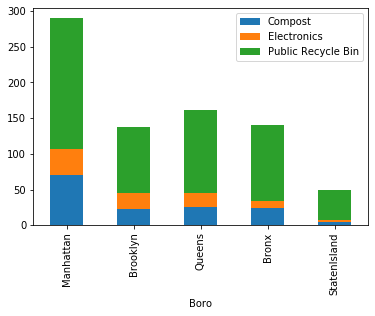

In [208]:
bins_plots.plot(x='Boro',kind='bar',stacked=True) #plotting all the different recycling stations at each borough

## <font color = "green"><b>In general, Staten Island needs the most recycling stations, especially the compost and electronics type. For Bronx, the no. of Electronics recycling zones can be upgraded.</b></font>

## <font color = "Blue"> 4. Illustration through Scatter Plot Map to visualize the distribution of Recycle stations throughout the New York City </font>

In [209]:
#Visualization of the distribution of recycle zones throughout NYC
#This section is built on dash and plotly
#Install dash and plotly packages on Anaconda to run
#download the .csv file locally
mapbox_access_token = 'pk.eyJ1Ijoic3JzeWVkMiIsImEiOiJja3J2N2VhazcwM3c3MndvMnY1MWR5OHc0In0.5KmPuNIXEoTtnlPzz0blXg'

df = pd.read_csv("finalrecycling.csv")

app = dash.Dash(__name__)

blackbold={'color':'black', 'font-weight': 'bold'}

app.layout = html.Div([
#---------------------------------------------------------------
# Map_legen + Borough_checklist + Recycling_type_checklist + Web_link + Map
    html.Div([
        html.Div([
            
            # Borough_checklist
            html.Label(children=['Borough: '], style=blackbold),
            dcc.Checklist(id='boro_name',
                    options=[{'label':str(b),'value':b} for b in sorted(df['boro'].unique())],
                    value=[b for b in sorted(df['boro'].unique())],
            ),

            # Recycling_type_checklist
            html.Label(children=['Looking to recycle: '], style=blackbold),
            dcc.Checklist(id='recycling_type',
                    options=[{'label':str(b),'value':b} for b in sorted(df['type'].unique())],
                    value=[b for b in sorted(df['type'].unique())],
            ),

            # Web_link
            html.Br(),
            html.Pre(id='web_link', children=[],
            style={'white-space': 'pre-wrap','word-break': 'break-all',
                 'border': '1px solid black','text-align': 'center',
                 'padding': '12px 12px 12px 12px', 'color':'blue',
                 'margin-top': '3px'}
            ),

        ], className='three columns'
        ),

        # Map
        html.Div([
            dcc.Graph(id='graph', config={'displayModeBar': False, 'scrollZoom': True},
                style={'background':'#00FC87','padding-bottom':'2px','padding-left':'2px','height':'100vh'}
            )
        ], className='nine columns'
        ),

    ], className='row'
    ),

], className='ten columns offset-by-one'
)

#---------------------------------------------------------------
# Output of Graph
@app.callback(Output('graph', 'figure'),
              [Input('boro_name', 'value'),
               Input('recycling_type', 'value')])

def update_figure(chosen_boro,chosen_recycling):
    df_sub = df[(df['boro'].isin(chosen_boro)) &
                (df['type'].isin(chosen_recycling))]

    # Create figure
    locations=[go.Scattermapbox(
                    lon = df_sub['longitude'],
                    lat = df_sub['latitude'],
                    mode='markers',
                    marker={'color' : df_sub['color']},
                    unselected={'marker' : {'opacity':1}},
                    selected={'marker' : {'opacity':0.5, 'size':22}},
                    hoverinfo='text',
                    hovertext=df_sub['hov_txt'],
                    
    )]

    # Return figure
    return {
        'data': locations,
        'layout': go.Layout(
            uirevision= 'foo', #preserves state of figure/map after callback activated
            clickmode= 'event+select',
            hovermode='closest',
            hoverdistance=2,
            title=dict(text="Recylcing Stations around NYC",font=dict(size=45, color='brown')),
            mapbox=dict(
                accesstoken=mapbox_access_token,
                bearing=25,
                style='light',
                center=dict(
                    lat=40.80105,
                    lon=-73.945155
                ),
                pitch=40,
                zoom=11.5
            ),
        )
    }
#---------------------------------------------------------------
# callback for Web_link
@app.callback(
    Output('web_link', 'children'),
    [Input('graph', 'clickData')])
def display_click_data(clickData):
    if clickData is None:
        return 'Hover on a bubble'
    else:
        # print (clickData)
        the_link=clickData['points'][0]['customdata']
        if the_link is None:
            return 'No Website Available'
        else:
            return html.A(the_link, href=the_link, target="_blank")
# #--------------------------------------------------------------
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: [Errno 48] Address already in use

# <font color = "blue" bold = true> Conclusion </font>

### <font color = "green"> Brooklyn and Staten Island requires more recycling stations to be able to minimize the disparity in distribution of recycle stations. To be more specific, in both Boroughs, more compost and electronics type recycling station should be deployed which lacks more compared to the public recycling bins.</font>